In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])

freq = 'D'
date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)

prices = np.sin(unix_dates)

for i in range(len(prices)):
    prices[i] = prices[i] + float(i) / 50

data = pd.DataFrame({'ds': date_rng, 'y': prices})
data['ds_numeric'] = data['ds'].apply(lambda x: x.value)

In [14]:
# Разделим данные на обучающую и тестовую выборки
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

In [15]:
# Подготовим данные для XGBoost
X_train = train_data[['ds_numeric']]
y_train = train_data['y']
X_test = test_data[['ds_numeric']]
y_test = test_data['y']


In [75]:

# Создадим и обучим модель XGBoost
xgb_model = XGBRegressor(n_estimators=70, learning_rate = 0.1, random_state=42, max_depth = 6)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=70, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [76]:

# Сделаем прогнозы на тестовой выборке
y_pred = xgb_model.predict(X_test)

In [77]:

# Вычислим среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4.712296597182464


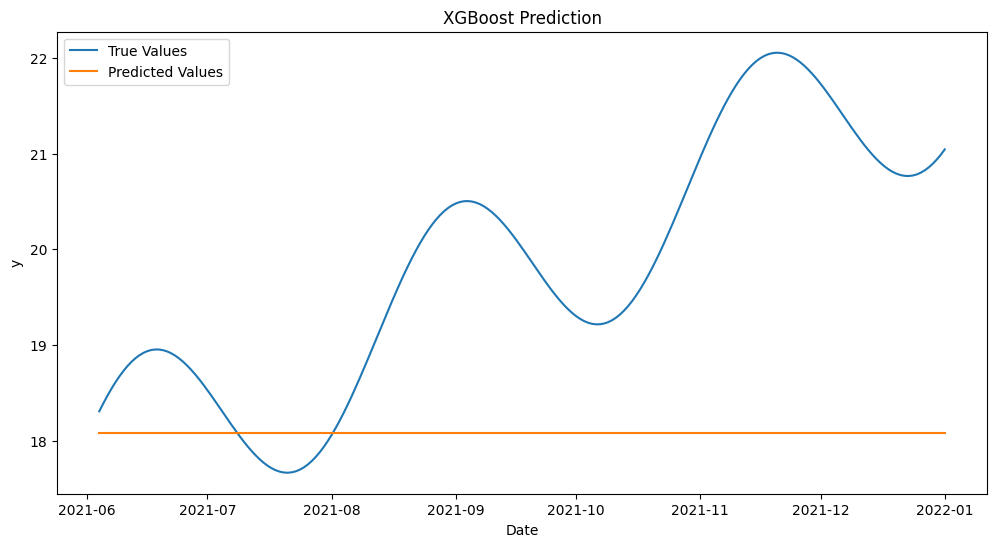

In [78]:
# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], y_test, label='True Values')
plt.plot(test_data['ds'], y_pred, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('y')
plt.title('XGBoost Prediction')
plt.legend()
plt.show()

Mean Squared Error: 4.328949017870059


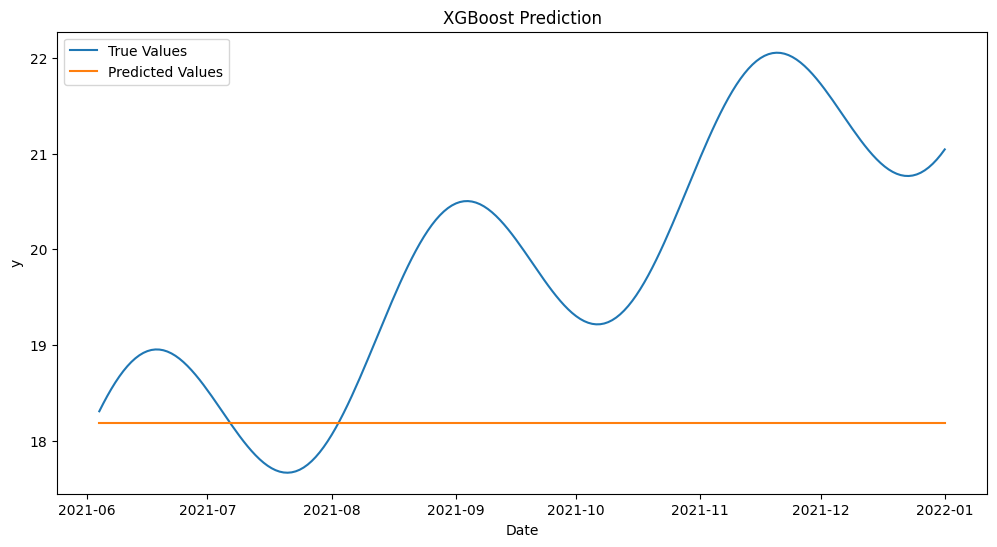

In [62]:
# Разделим данные на обучающую и тестовую выборки
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Подготовим данные для XGBoost
X_train = train_data[['ds_numeric']]
y_train = train_data['y']
X_test = test_data[['ds_numeric']]
y_test = test_data['y']

# Создадим и обучим модель XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Сделаем прогнозы на тестовой выборке
y_pred = xgb_model.predict(X_test)

# Вычислим среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], y_test, label='True Values')
plt.plot(test_data['ds'], y_pred, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('y')
plt.title('XGBoost Prediction')
plt.legend()
plt.show()

Mean Squared Error: 7.168466937396488


d:\Program Files\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\Program Files\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


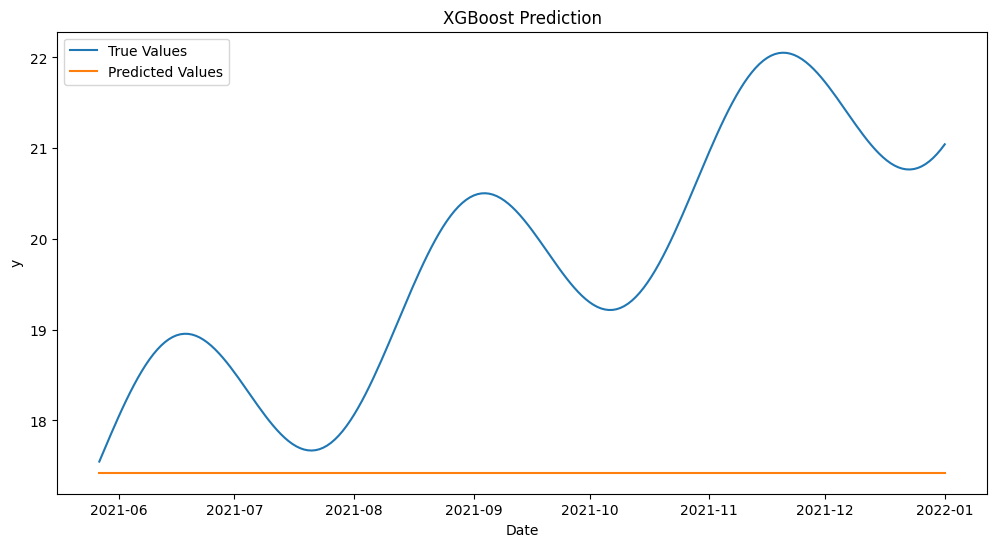

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ваш код для создания данных
start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])

freq = 'D'
date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)

prices = np.sin(unix_dates)

for i in range(len(prices)):
    prices[i] = prices[i] + float(i) / 50

data = pd.DataFrame({'ds': date_rng, 'y': prices})
data['ds_numeric'] = data['ds'].apply(lambda x: x.value)

# Добавим дополнительные признаки
data['log_y'] = np.log(data['y'])
data['sqrt_y'] = np.sqrt(data['y'])
data['squared_y'] = data['y'] ** 2

# Разделим данные на обучающую и тестовую выборки
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Подготовим данные для XGBoost
X_train = train_data[['ds_numeric', 'log_y', 'sqrt_y', 'squared_y']]
y_train = train_data['y']
X_test = test_data[['ds_numeric', 'log_y', 'sqrt_y', 'squared_y']]
y_test = test_data['y']

# Создадим и обучим модель XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Сделаем прогнозы на тестовой выборке
y_pred = xgb_model.predict(X_test)

# Вычислим среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], y_test, label='True Values')
plt.plot(test_data['ds'], y_pred, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('y')
plt.title('XGBoost Prediction')
plt.legend()
plt.show()